In [1]:
import sys
import os
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parent_dir)

In [2]:
import numpy as np
from model import VAE
import torch
import matplotlib.pyplot as plt
import numpy as np
from model import VAE
from dataloader import create_data_loaders, print_batch_info

In [3]:
# file_path = '../output/working_dir/latent_spaces/30.npy' 
# data = np.load(file_path)
# print(data.shape)

In [4]:
z = torch.load('../output/wd/latent_spaces/1')

/tmp/ipykernel_4368/4252965478.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  z = torch.load('../output/wd/latent_spaces/1')


In [17]:
latent_space = data
means = latent_space.mean(axis=0)
variances = latent_space.var(axis=0)

print(f"Means of latent dimensions: {means}")
print(f"Variances of latent dimensions: {variances}")


Means of latent dimensions: [ 7.875563    0.71929747 -8.270087    0.05260389  3.4589205  -4.8103704
 -3.7743871   1.2519821  -7.1894665   0.4666841   3.4497972   1.1225641
 -2.4503798  -0.71425664 -8.063764   -2.4218996   1.458384    3.916566
  1.7613268   4.834461    2.462471    0.7984232   2.9764123   3.403405
 -2.236376    4.855274   -1.0657957   3.186637    1.6512281   2.0764587 ]
Variances of latent dimensions: [ 56.189808  76.879295 105.48626   51.307945  88.02062  296.2268
  38.186302  75.17332   20.79292   69.17202   37.6976    77.97211
  43.405586  43.30746   50.895283  47.691727 105.00041   45.629726
  42.0415    70.37527   60.8568    50.939133  80.47204   67.92997
  59.34712   70.70114   51.964336  58.261024  57.87393   52.12531 ]


In [20]:
import numpy as np

# File paths
file_path_29 = '../output/working_dir/latent_spaces/29.npy'
file_path_30 = '../output/working_dir/latent_spaces/30.npy'

# Load the latent spaces
data_29 = np.load(file_path_29)
data_30 = np.load(file_path_30)

# Check the shapes
print(f"Shape of data_29: {data_29.shape}")
print(f"Shape of data_30: {data_30.shape}")

# Ensure they have the same shape
if data_29.shape != data_30.shape:
    raise ValueError("The latent spaces do not have the same shape!")

# Extract the first image's latent vector
first_image_29 = data_29[1]
first_image_30 = data_30[1]

# Compare the values
difference = first_image_30 - first_image_29

# Output the results
# print(f"Latent vector of first image in 29.npy: {first_image_29}")
# print(f"Latent vector of first image in 30.npy: {first_image_30}")
print(f"Difference: {difference}")


Shape of data_29: (25, 30)
Shape of data_30: (25, 30)
Difference: [ 0.43858528 -2.0182793  -0.82928944  0.49969435  4.1900587   5.431711
 -3.057581   -0.58749294 -4.0404534  -5.309479    3.4308019   6.348887
 -2.4247837  -2.5423431  -5.4476953  -5.79457     1.2743235  -2.834028
 -4.0599737   5.8571033   4.360486   -0.7339287  -1.3372993  -0.8115032
 -2.0777612   0.7828256  -4.013315    1.9675155  -3.7029023   0.73061085]


In [21]:
import numpy as np

# File paths
file_path_x = '../output/working_dir/latent_spaces/31.npy'
file_path_y = '../output/working_dir/latent_spaces/32.npy'

# Load the latent spaces
data_x = np.load(file_path_x)
data_y = np.load(file_path_y)

# Check the shapes
print(f"Shape of data_29: {data_x.shape}")
print(f"Shape of data_30: {data_y.shape}")

# Ensure they have the same shape
if data_x.shape != data_y.shape:
    raise ValueError("The latent spaces do not have the same shape!")

# Extract the first image's latent vector
first_image_x = data_x[1]
first_image_y = data_y[1]

# Compare the values
difference = first_image_x - first_image_y

# Output the results
# print(f"Latent vector of first image in 29.npy: {first_image_29}")
# print(f"Latent vector of first image in 30.npy: {first_image_30}")
print(f"Difference: {difference}")


Shape of data_29: (25, 30)
Shape of data_30: (25, 30)
Difference: [-10.840425    -0.37172198  -3.831831    -1.5570936   -7.336629
  -2.7302547   -6.528363     6.1124725    3.6597285   -9.555386
   5.0414705   -4.2090716   -2.3589249    2.2842584   -7.072094
   6.693192    -0.26296186   4.5908833    5.742799     0.46590805
   7.565258    -2.1348183   -2.176054    -6.1870937   -4.057643
   6.7812347    2.3954191    0.33423138  -1.4218901    4.190437  ]


In [7]:
def load_vae(encoder_path, decoder_path, input_shape=(224, 224), latent_dim=30):
    """
    Load both encoder and decoder parts of a VAE model from saved state dictionaries.

    Parameters:
        input_shape (tuple): The shape of the input images, e.g., (224, 224).
        latent_dim (int): The dimension of the latent space.
        encoder_path (str): Path to the saved encoder state dictionary file.
        decoder_path (str): Path to the saved decoder state dictionary file.

    Returns:
        VAE: A VAE model with both the encoder and decoder loaded.
    """
    # Initialize the VAE model with the provided latent dimension and input shape
    vae = VAE(latent_dim=latent_dim, input_shape=input_shape)

    # Load the saved encoder and decoder state dictionaries
    encoder_state_dict = torch.load(encoder_path, weights_only=True)
    decoder_state_dict = torch.load(decoder_path, weights_only=True)

    # Load the state dictionaries into the model's encoder and decoder
    vae.encoder.load_state_dict(encoder_state_dict)
    vae.decoder.load_state_dict(decoder_state_dict)

    # Set both encoder and decoder to evaluation mode if using for inference
    vae.encoder.eval()
    vae.decoder.eval()

    print(f"Encoder and Decoder models loaded successfully from {encoder_path} and {decoder_path}")

    return vae


In [25]:
def get_mu_and_log_var(vae, dataloader, num_batches=1):
    """
    Extract the mean (mu) and log-variance (logvar) from the encoder for a batch of images.

    Parameters:
        vae (VAE): The VAE model with a loaded encoder.
        dataloader (DataLoader): A PyTorch DataLoader providing batches of images.
        num_batches (int): Number of batches to process (default is 1).

    Returns:
        tuple: (mu, logvar) for the last processed batch.
    """
    # Ensure the encoder is in evaluation mode
    vae.encoder.eval()

    mu_logvar_list = []
    with torch.no_grad():  # Disable gradient computation for inference
        for i, (images, _) in enumerate(dataloader):
            if i >= num_batches:
                break

            # Get mu and logvar from the encoder
            mu, logvar = vae.encoder(images)
            mu_logvar_list.append((mu, logvar))

            print(f"Batch {i+1} - Mu: {mu.shape}, LogVar: {logvar.shape}")
    
    return mu, logvar

In [16]:
import matplotlib.pyplot as plt

def display_reconstructed_images(recon_images, num_images=25):
    """
    Display a grid of reconstructed images.

    Parameters:
        recon_images (Tensor): A batch of reconstructed images with shape (N, C, H, W).
        num_images (int): Number of images to display (default is 25).
    """
    # Limit the number of images to display
    num_images = min(num_images, recon_images.shape[0])
    recon_images = recon_images[:num_images]

    # Determine grid size (5 images per row)
    num_rows = (num_images + 4) // 5
    fig, axes = plt.subplots(num_rows, 5, figsize=(15, num_rows * 3))

    # Flatten axes for easy indexing if only one row
    axes = axes.flatten() if num_rows > 1 else [axes]

    # Iterate through the reconstructed images and plot them
    for idx in range(num_images):
        ax = axes[idx]
        ax.imshow(recon_images[idx].permute(1, 2, 0).detach().cpu().numpy())  # (C, H, W) -> (H, W, C)
        ax.axis('off')

    # Turn off unused subplots
    for ax in axes[num_images:]:
        ax.axis('off')

    plt.suptitle("Reconstructed Images")
    plt.tight_layout()
    plt.show()


In [28]:
import torch
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

def latent_space_traversal(latent_vector, decoder, latent_dim=30, num_steps=10, spacing=1.0, device='cpu'):
    """
    Function to traverse the latent space by varying each dimension of the latent vector.
    
    Parameters:
        latent_vector (Tensor): The latent vector for a single image of shape (1, latent_dim).
        decoder (nn.Module): The trained decoder model to generate images from latent space.
        latent_dim (int): The dimensionality of the latent space (default is 30).
        num_steps (int): Number of steps to vary each dimension (default is 10).
        spacing (float): The spacing of the changes in each dimension (default is 1.0).
        device (str): The device on which to run the model ('cpu' or 'cuda').
    """
    # Ensure the latent vector is on the correct device
    latent_vector = latent_vector.to(device)

    # Prepare the figure for plotting with large image sizes
    fig, axes = plt.subplots(latent_dim, num_steps, figsize=(20, 40))  # Increase figure size

    for dim in range(latent_dim):
        # Start with the original latent vector
        original_latent_vector = latent_vector.clone()

        for i in range(num_steps):
            # Create a new latent vector where only the `dim`-th dimension is modified
            new_latent_vector = original_latent_vector.clone()
            new_latent_vector[0, dim] = latent_vector[0, dim].item() + i * spacing  # Modify the `dim`-th dimension

            # Decode the new latent vector and generate the corresponding image
            with torch.no_grad():
                generated_image = decoder(new_latent_vector)

            # Plot the generated image
            ax = axes[dim, i]
            ax.imshow(generated_image.squeeze(0).permute(1, 2, 0).cpu().numpy())  # Remove batch dimension and permute to (H, W, C)
            ax.axis('off')
            if i == 0:
                ax.set_title(f"Latent Dim {dim}")

    plt.suptitle(f"Latent Space Traversal (Varying each dimension)", fontsize=16)
    
    # Adjust layout and spacing to make images larger
    plt.subplots_adjust(hspace=0.5, wspace=0.5)

    # Show the plot
    plt.savefig("output/latentspacetraversel.png")
    plt.show()

Latent dimension: 30
Encoder and Decoder models loaded successfully from ../output/working_dir/model/epoch_31/31_encoder.pth and ../output/working_dir/model/epoch_31/31_decoder.pth
torch.Size([25, 3, 224, 224])


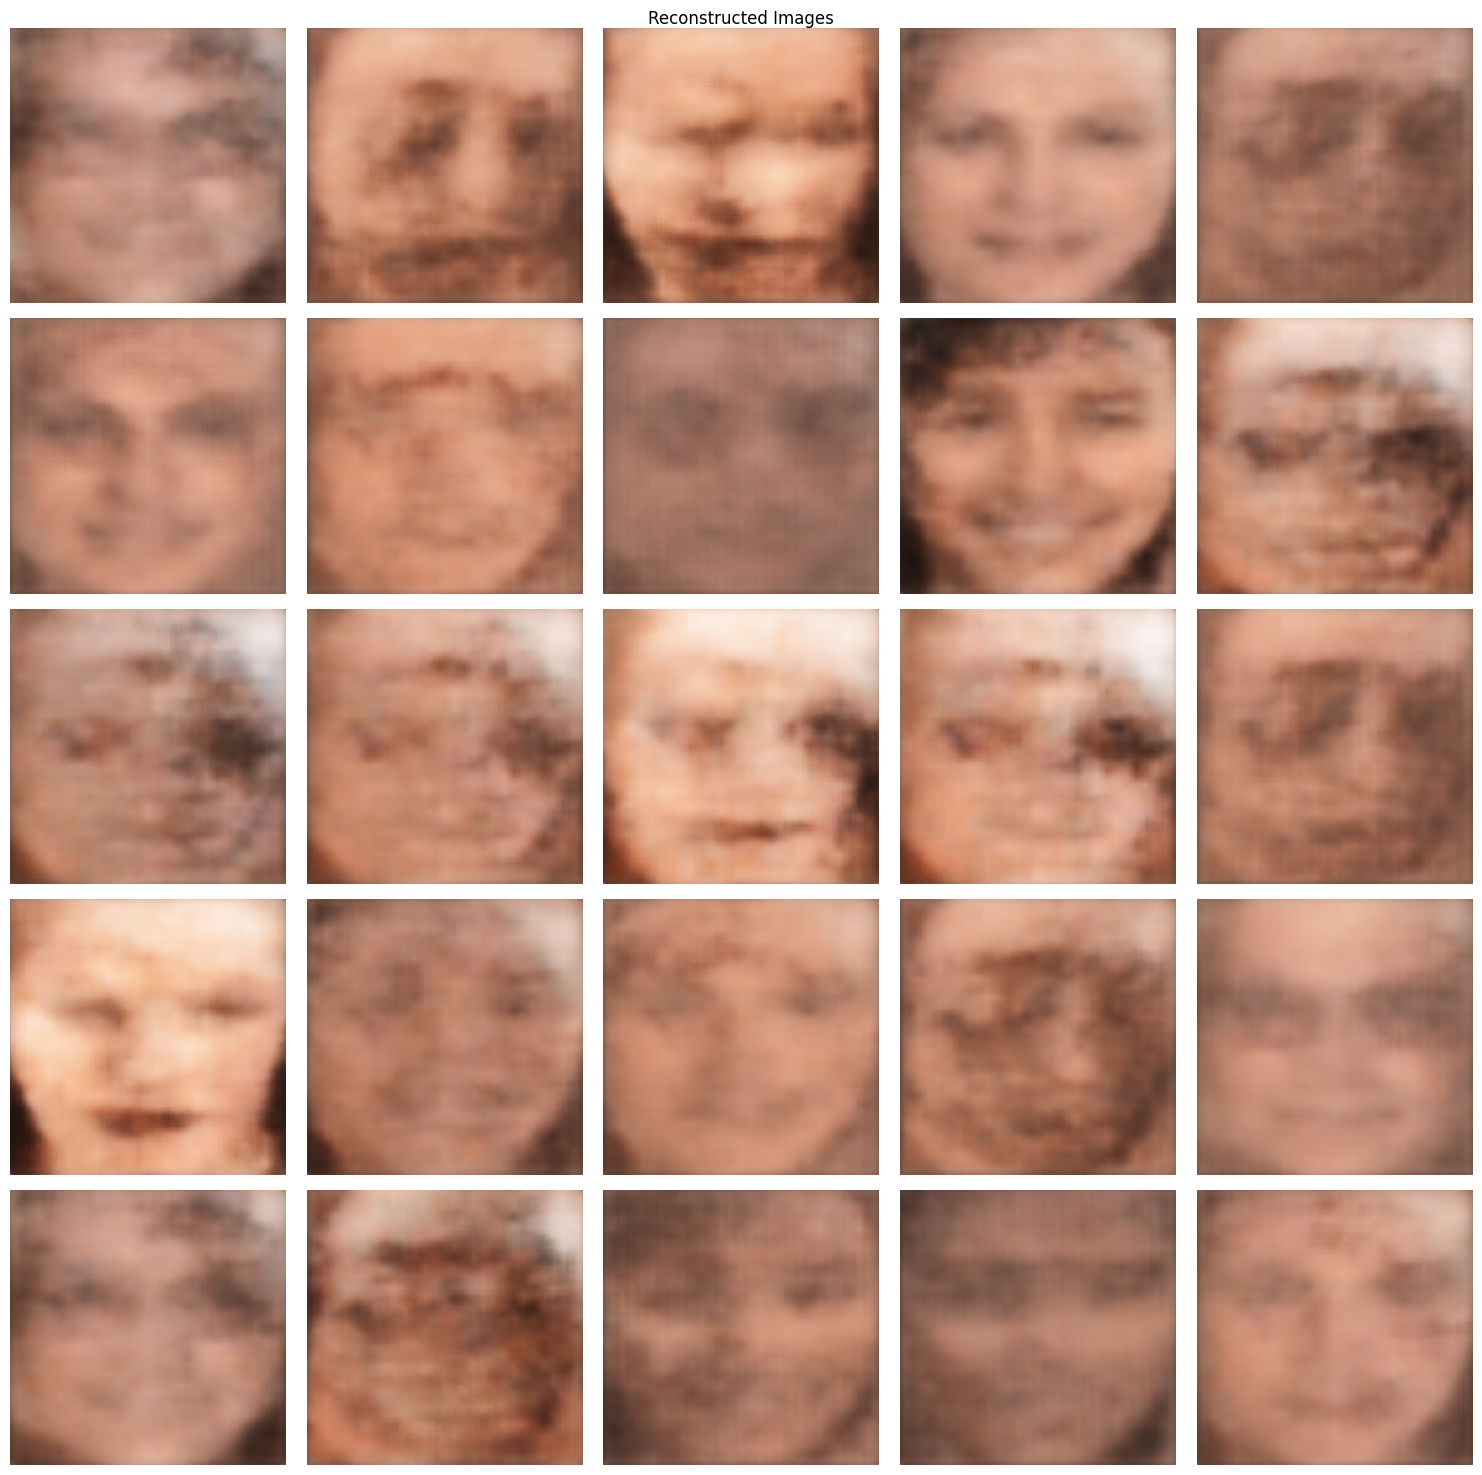

In [17]:
vae = load_vae(
        encoder_path='../output/working_dir/model/epoch_31/31_encoder.pth',
        decoder_path='../output/working_dir/model/epoch_31/31_decoder.pth')


reconstruted_image = vae.decoder(z)
print(reconstruted_image.shape)
display_reconstructed_images(recon_images=reconstruted_image)

# images, _ = next(iter(train_loader))
    
# # Pass the images through the VAE to get reconstructed images
# mu, log_var = get_mu_and_log_var(vae, train_loader, 1)
# reconstructed_image = vae.decoder(mu)
    
# # Display original and reconstructed images
# display_images(images, reconstructed_image, num_images=25)

# # Get the 6th image's latent vector (mu)
# latent_vector_nth_image = mu[0].unsqueeze(0)  
    
#     # Now perform latent space traversal using the 6th image's latent vector
# latent_space_traversal(latent_vector_nth_image, vae.decoder, latent_dim=30, num_steps=10, spacing=0.5, device='cpu')
